# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [52]:
i = 0
for city in cities:
    i+=1
    print(f"{i}. {city}")

1. tara
2. klaksvik
3. meadow lake
4. punta arenas
5. avarua
6. illoqqortoormiut
7. upernavik
8. eidfjord
9. vaini
10. puerto ayora
11. saleaula
12. alofi
13. butaritari
14. tautira
15. barrow
16. cherskiy
17. albany
18. kurilsk
19. fairbanks
20. ushuaia
21. yerbogachen
22. avera
23. laguna
24. rikitea
25. tumannyy
26. basco
27. rio tinto
28. longyearbyen
29. hermanus
30. taolanaro
31. busselton
32. hilo
33. winnemucca
34. belushya guba
35. mataura
36. lebu
37. road town
38. nizhneyansk
39. narsaq
40. east london
41. safranbolu
42. jamestown
43. ribeira grande
44. flin flon
45. saldanha
46. sitka
47. mount gambier
48. vaitupu
49. hasaki
50. tsihombe
51. riyadh
52. new norfolk
53. tambopata
54. mys shmidta
55. clyde river
56. chuy
57. port elizabeth
58. katsuura
59. inirida
60. axim
61. port shepstone
62. wanaka
63. severo-kurilsk
64. gulshat
65. cape town
66. nanortalik
67. antalya
68. yellowknife
69. attawapiskat
70. golden
71. port lincoln
72. buala
73. george town
74. kahului
75. sa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# This code cell is taken from the course instructor's starter code file. I do not claim writing it, but I do understand what
# it is doing, in that it is requesting info from the Weather API, receiving it, and compiling it in a list for further use.

rows = []

for i in range(len(cities)):
    city = cities[i]
    
    # only print every 50th city
    if i % 50 == 0:
        print()
        print(f"Index: {i}, City: {city}")
    
    row = {}
    try:
    
        # get the geocode, lat and long
        url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}"
        response = requests.get(url)

        if (response.status_code == 200):
            data = response.json()

            # parse data
            if (len(data) > 0):
                lat = data[0]["lat"]
                lon = data[0]["lon"]

                # make second request to get weather
                url2 = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial'
                response2 = requests.get(url2)

                if (response2.status_code == 200):
                    data2 = response2.json()

                    # parse data
                    weather = data2["weather"][0]["main"]
                    temp = data2["main"]["temp"]
                    humid = data2["main"]["humidity"]
                    pressure = data2["main"]["pressure"]
                    wind = data2["wind"]["speed"]
                    clouds = data2["clouds"]["all"]
                else:
                    print(f"Weather request failed for {city}")
                    weather = None
                    temp = np.nan
                    humid = np.nan
                    pressure = np.nan
                    wind = np.nan
                    clouds = np.nan

                # put into flat dictionary
                row["city"] = city
                row["latitude"] = lat
                row["longitude"] = lon
                row["weather"] = weather
                row["temperature"] = temp
                row["humidity"] = humid
                row["pressure"] = pressure
                row["wind_speed"] = wind
                row["cloudiness"] = clouds

                # append to list
                rows.append(row)

            else:
                print(f"no lat/long for {city}")
                pass
        else:
            print(f"failed request for geocode for {city}")
            pass
    except Exception as e:
        print(e)
        print(f"Oh no! Everything failed and broke for {city}. There should be an error above. Sux")
        print()
        
    # sleep
    time.sleep(2)


Index: 0, City: tara
no lat/long for saleaula
no lat/long for cherskiy
no lat/long for tumannyy
no lat/long for taolanaro

Index: 50, City: riyadh
no lat/long for gulshat
no lat/long for vokhma

Index: 100, City: hobart
no lat/long for basyanovskiy
no lat/long for skalistyy
no lat/long for tazovskiy

Index: 150, City: russell

Index: 200, City: udachnyy
no lat/long for tatawin
no lat/long for bambanglipuro
no lat/long for sentyabrskiy

Index: 250, City: saint andrews
no lat/long for tinskoy
no lat/long for beringovskiy

Index: 300, City: minuri
no lat/long for bireun
no lat/long for lixourion
no lat/long for azar shahr

Index: 350, City: wencheng
no lat/long for kegayli

Index: 400, City: kompaniyivka
no lat/long for kompaniyivka
no lat/long for uruzgan
no lat/long for warqla
no lat/long for tabiauea

Index: 450, City: yar-sale
no lat/long for yar-sale
no lat/long for jabinyanah

Index: 500, City: siguiri
no lat/long for kargapolye

Index: 550, City: natal
no lat/long for bur gabo
no 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame(rows)
weather_df.head()

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness
0,tara,47.390047,0.688927,Clear,48.33,88,1018,3.44,0
1,klaksvik,62.226608,-6.585271,Rain,49.24,93,979,22.48,90
2,meadow lake,54.130260,-108.435059,Clouds,8.58,72,1025,4.61,100
3,punta arenas,-53.162569,-70.907822,Clouds,51.30,43,1007,19.51,89
4,avarua,-21.207474,-159.770815,Clouds,76.98,73,1018,13.80,20


In [24]:
weather_df.describe()

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,21.169982,12.139258,56.926502,73.597270,1013.953925,8.322218,56.616041
std,32.527637,88.499993,24.106265,20.227634,8.714048,6.519607,40.278106
min,-54.806116,-179.413096,-34.220000,10.000000,978.000000,0.000000,0.000000
25%,-5.111819,-66.870738,43.090000,62.250000,1010.000000,3.650000,14.250000
50%,25.077544,17.387980,63.905000,79.000000,1013.000000,6.735000,73.500000
75%,47.080510,88.325363,76.442500,88.750000,1019.000000,10.860000,100.000000
max,81.142079,178.680784,96.030000,100.000000,1038.000000,39.640000,100.000000


In [25]:
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
mask = weather_df.humidity > 100
weather_df.loc[mask]

,city,latitude,longitude,weather,temperature,humidity,pressure,wind_speed,cloudiness


In [27]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         586 non-null    object 
 1   latitude     586 non-null    float64
 2   longitude    586 non-null    float64
 3   weather      586 non-null    object 
 4   temperature  586 non-null    float64
 5   humidity     586 non-null    int64  
 6   pressure     586 non-null    int64  
 7   wind_speed   586 non-null    float64
 8   cloudiness   586 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 41.3+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

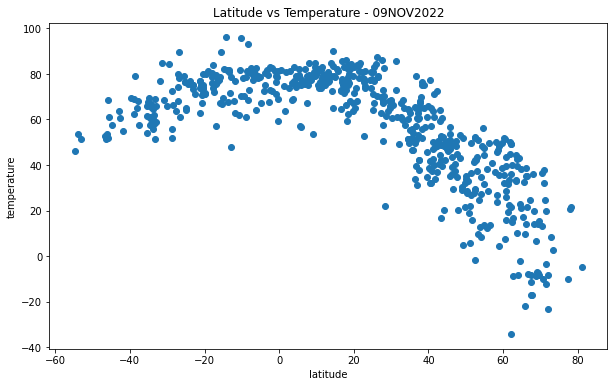

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.temperature)
plt.title("Latitude vs Temperature - 09NOV2022")
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()

The above scatter plot displays data for the current temperature of all of the cities of interest, versus their latitude value on the Earth.

## Latitude vs. Humidity Plot

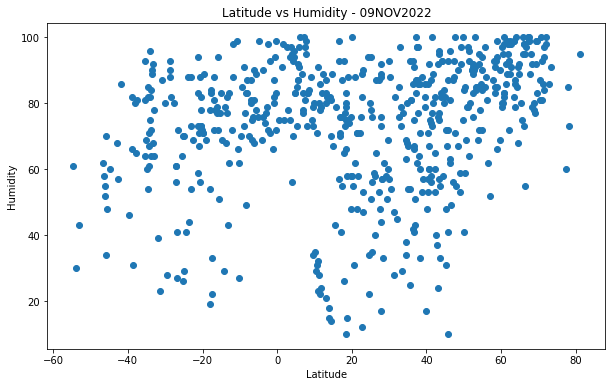

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.humidity)
plt.title("Latitude vs Humidity - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The above scatter plot displays data for the current humidity of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that humidity is higher as latitude is higher.

## Latitude vs. Cloudiness Plot

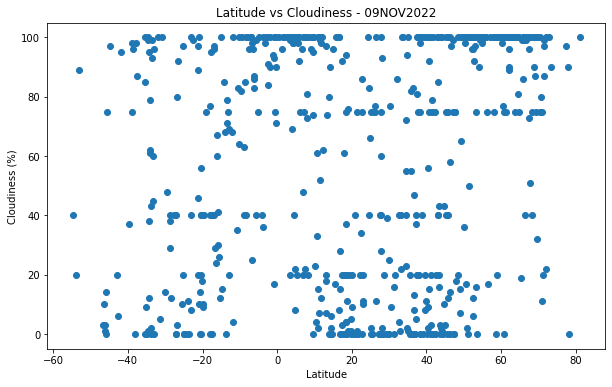

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.cloudiness)
plt.title("Latitude vs Cloudiness - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

The above scatter plot displays data for the current cloudiness percentage of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that cloudiness varies and does not correlate with latitude.

## Latitude vs. Wind Speed Plot

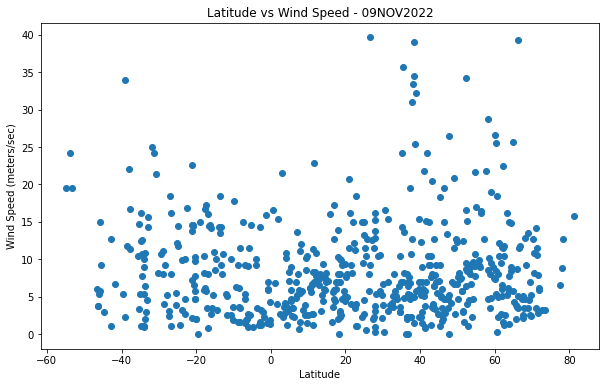

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(weather_df.latitude, weather_df.wind_speed)
plt.title("Latitude vs Wind Speed - 09NOV2022")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meters/sec)')
plt.show()

The above scatter plot displays data for the current wind speed of all of the cities of interest, versus their latitude value on the Earth. Data appears to show that wind speed is generally below 10 meters per second, regardless of a city's latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7140760908293732


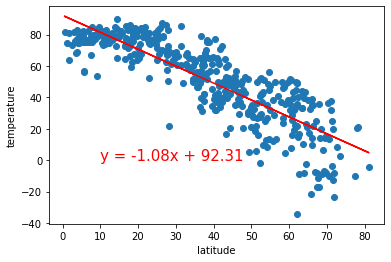

In [41]:
# The code cell again is borrowed and credited to the course instructor with some minor tweaks. I do understand that this code
# is constructing a scatter plot of max temp vs latitude for cities located in the northern hemisphere, and also displaying a 
# regression line that emphasizes a correlation of data for as a city is higher in latitude, it is also lower in temperature.

df2 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

# Print out the r-squared value along with the plot.
x_values = df2['latitude']
y_values = df2['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a correlation in data for cities in latitude and temperature, where the higher the latitude of the city, generally the temperature will be lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38319138776080774


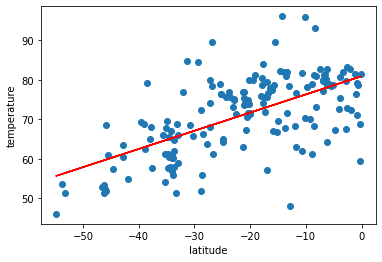

In [39]:
df3 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df3['latitude']
y_values = df3['temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a correlation in data for cities in latitude and temperature, where the higher the latitude of the city, generally the temperature will be higher as well.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08274442754466026


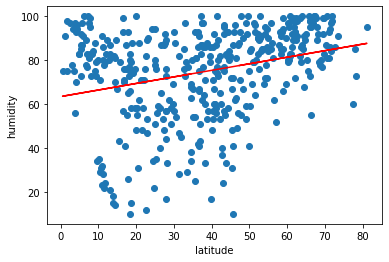

In [42]:
df4 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df4['latitude']
y_values = df4['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a slight correlation in data for cities in humidity and latitude, where the higher the latitude of the city, generally the humidity will be higher as well.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10244239752093504


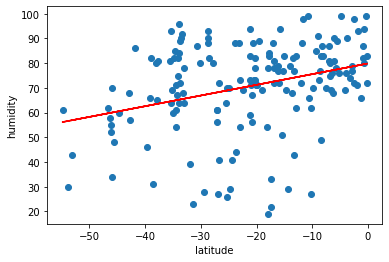

In [43]:
df5 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df5['latitude']
y_values = df5['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a slight correlation in data for cities in humidity and latitude, where the higher the latitude of the city, generally the humidity will be higher as well.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06897681195995455


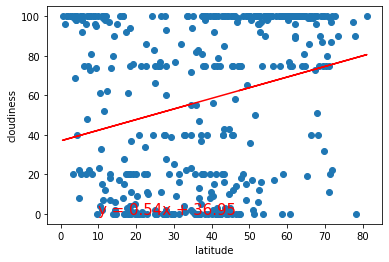

In [44]:
df6 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df6['latitude']
y_values = df6['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in cloudiness and latitude, however, most cities either appear to be not cloudy at all or very cloudy.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1104965835378601


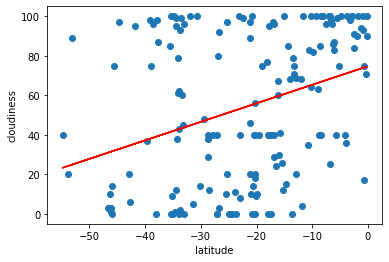

In [45]:
df7 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df7['latitude']
y_values = df7['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in cloudiness and latitude, however, most cities either appear to be not cloudy at all or very cloudy.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010657912090913525


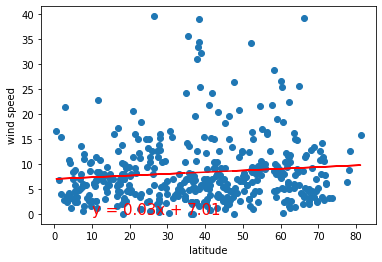

In [46]:
df8 = weather_df.loc[weather_df.latitude > 0].reset_index(drop=True)

x_values = df8['latitude']
y_values = df8['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in wind speed and latitude, however, most cities appear to not have very high wind speeds.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07282685801656083


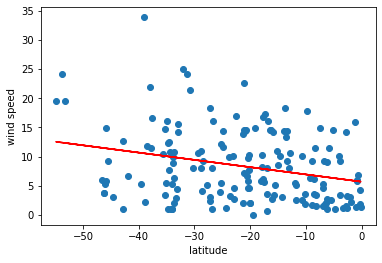

In [47]:
df9 = weather_df.loc[weather_df.latitude < 0].reset_index(drop=True)

x_values = df9['latitude']
y_values = df9['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('wind speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The scatter plot and regession model above shows that there is a not much of a correlation in data for cities in wind speed and latitude, however, most cities appear to not have very high wind speeds.